In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from math import fabs
from random import randint

In [104]:
# Definindo algumas constantes
saidas = ['DOMPRECDOMEXP', 'DOMPRECRESEXP', 'ADENSEXCDOMEXP', 'ADENSEXCRESEXP',	'ONUSEXCDOMEXP', 'ONUSEXCRESEXP', 'COABFAMDOMEXP', 'COABFAMRESEXP']
saidasDomicilios = ['DOMPRECDOMEXP', 'ADENSEXCDOMEXP', 'ONUSEXCDOMEXP', 'COABFAMDOMEXP']
saidasDesidentes = ['DOMPRECRESEXP', 'ADENSEXCRESEXP', 'ONUSEXCRESEXP', 'COABFAMRESEXP']
domiciliosPrecarios = ['DOMPRECDOMEXP']
adensamentoExcessivo = ['ADENSEXCDOMEXP']
onusExcessivo = ['ONUSEXCDOMEXP']
coabtaçãoFamiliar = ['COABFAMDOMEXP']

In [105]:
# Importa os dados
deficit_data_y = pd.read_excel('AP-2010-SP-REDUZIDO-REV02.sav.xlsx')[saidasDomicilios]
deficit_data_x = pd.read_excel('2024_02_29_Dimensoes.xlsx')

# Concatena os dois blocos horizontalmente
deficit_data = pd.concat([deficit_data_x, deficit_data_y], axis=1)

# Exibe o banco de dados
deficit_data

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,DOMPRECDOMEXP,ADENSEXCDOMEXP,ONUSEXCDOMEXP,COABFAMDOMEXP
0,-4.255267,1.636565,-0.734032,0.249567,-0.490873,9.55,0.00,308.77,90
1,-0.902284,-0.905511,-0.164092,-0.336964,-0.130283,11.43,126.68,333.07,686
2,-3.514829,-0.457965,0.832445,-0.888344,0.783307,78.55,39.05,111.92,235
3,0.383952,0.202920,-0.351442,0.387851,0.348902,20.22,138.96,496.56,484
4,-1.425747,0.337700,-0.249719,0.413795,0.236795,8.57,120.49,373.83,337
...,...,...,...,...,...,...,...,...,...
898,-2.160979,-0.774764,2.681624,-1.242698,-0.451944,22.77,88.48,52.31,480
899,3.486756,1.296490,0.961841,-1.467687,1.530743,19.36,64.34,313.49,881
900,-3.217481,0.661316,-0.593865,0.031387,0.020535,0.00,76.27,157.44,389
901,-1.105044,0.994186,-0.674440,-0.233511,-0.088889,47.05,21.22,390.45,670


In [106]:
# Embaralha a ordem das amostras e divide em blocos de treino (80%) e teste (20%)
train, test = train_test_split(deficit_data, test_size=0.2, random_state=randint(0, 100))

train_x = train.drop(columns=saidasDomicilios)
validation_x = test.drop(columns=saidasDomicilios)
train_y = train[saidasDomicilios]
validation_y = test[saidasDomicilios]

numLines = int(validation_x.shape[0] * 0.25) #Equivalente a aproximadamente 5% do banco de dados

# Separa uma parte do bloco de validação para teste
validation_x, test_x = validation_x[:numLines], validation_x[numLines:]
validation_y, test_y = validation_y[:numLines], validation_y[numLines:]

In [107]:
# Inicializa a rede neural
neuralNetwork = Sequential()
neuralNetwork.add(Dense(units = 24, activation = 'relu', input_dim = validation_x.shape[1]))
neuralNetwork.add(Dense(units = train_y.shape[1], activation = 'linear'))
neuralNetwork.compile(loss = 'huber', optimizer = 'rmsprop', metrics = ['mae'])

In [108]:
# Inicia o treinamento da rede
redes_treinadas = neuralNetwork.fit(train_x, train_y, epochs = 400, batch_size = 32, validation_data = (validation_x, validation_y))

Epoch 1/400
23/23 [==============================] - 0s 5ms/step - loss: 313.2206 - mae: 313.7073 - val_loss: 296.4248 - val_mae: 296.9107
Epoch 2/400
23/23 [==============================] - 0s 1ms/step - loss: 312.8919 - mae: 313.3783 - val_loss: 296.1101 - val_mae: 296.5975
Epoch 3/400
23/23 [==============================] - 0s 1ms/step - loss: 312.5888 - mae: 313.0786 - val_loss: 295.7895 - val_mae: 296.2818
Epoch 4/400
23/23 [==============================] - 0s 1ms/step - loss: 312.2687 - mae: 312.7626 - val_loss: 295.4507 - val_mae: 295.9466
Epoch 5/400
23/23 [==============================] - 0s 1ms/step - loss: 311.9409 - mae: 312.4382 - val_loss: 295.1012 - val_mae: 295.5993
Epoch 6/400
23/23 [==============================] - 0s 1ms/step - loss: 311.5886 - mae: 312.0876 - val_loss: 294.7250 - val_mae: 295.2242
Epoch 7/400
23/23 [==============================] - 0s 1ms/step - loss: 311.2152 - mae: 311.7149 - val_loss: 294.3290 - val_mae: 294.8287
Epoch 8/400
23/23 [========

95.86117553710938


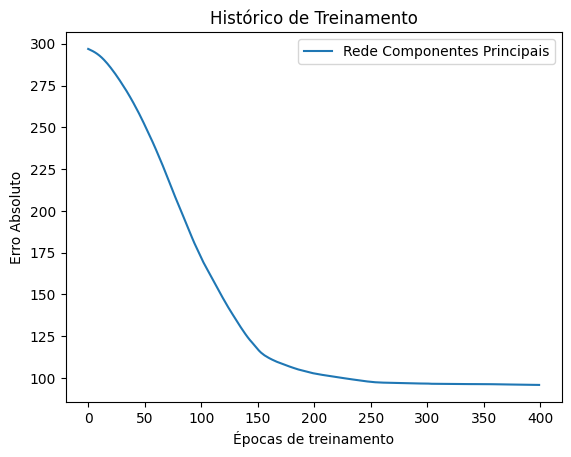

In [109]:
# Imprime o menor erro absoluto médio encontrado
print(min(neuralNetwork.history.history['val_mae']))

# Plota o gráfico de convegência do treinamento
plt.plot(neuralNetwork.history.history['val_mae'])
plt.title('Histórico de Treinamento')
plt.ylabel('Erro Absoluto')
plt.xlabel('Épocas de treinamento')
plt.legend(['Rede Componentes Principais'])
plt.show()

In [110]:
# Insere os valores de teste na rede e coleta os resultados gerados pela rede
predicts = neuralNetwork.predict(test_x)

5/5 [==============================] - 0s 838us/step


In [111]:
errorPercentage = []

# Calculo do tamanho do erro
for i in range(test_y.shape[0]):
    errorPercentage.append([])

    for j in range(test_y.shape[1]):
        erro = fabs(predicts[i][j] - test_y.iloc[i,j]) # Calcula o módulo da diferença entre o valor real e o gerado pela rede

        if test_y.iloc[i,j] != 0: # Verifica se o valor real é diferente de zero para evitar divisão por zero
            errorPercentage[i].append((erro / test_y.iloc[i,j])*100) # Calcula a porcentagem do tamanho do erro em relaçao ao valor real

        else:
            errorPercentage[i].append(None)  # Substitui a porcentagem com um valor nulo para ser descartado

# Exibe o resultado
for i in errorPercentage:
    print(i)

[77.93523688993692, 21.89238502459511, 45.260026118621944, 14.975824571193607]
[65.07698975257995, 457.0528352181941, 28.03426716418955, 36.18987581623134]
[None, 33.9971339787011, 14.651395166685635, 43.54951238057699]
[10.868554303774452, 73.45284737419495, 53.36424922420597, 21.975157558127485]
[651.1648845272838, 3349.651492693187, 151.66582557904246, 55.614819572967235]
[79.5775522827631, 35.46758379255023, 139.3970989036961, 35.051307678222656]
[85.72364652143123, 706.2102665294713, 70.5721594893705, 41.59064849360413]
[72.12639411587128, 1.172622876482686, 50.311848379984426, None]
[44.492194527073906, 39.867612418442086, 32.30038925031973, 15.437231331228096]
[4.563326805050762, 35.62291186088542, 27.102823131616294, 23.84179046799465]
[None, 34.37637830152773, 16.443029232589716, 53.56890544799215]
[177.8261618080711, 191.73137788978858, 38.11515896185081, 11.523496258273164]
[45.213860821870206, 134.4849944955597, 186.7280650001335, 2.0590050768243615]
[None, 67.4258456228754

In [112]:
meanErrorPercentage = []

# Calcula a média das porcentagens excluindo os valores nulos
for i in range(test_y.shape[1]):
    sum = 0
    counter = test_y.shape[0]

    for j in range(test_y.shape[0]):
        if errorPercentage[j][i] == None:
            counter -= 1

        else:
            sum += errorPercentage[j][i]

    meanErrorPercentage.append(sum/counter)

print("Média do Erro em Porcetagem")
for i in range(len(meanErrorPercentage)):
    print("{}: {:.2f}%".format(saidasDomicilios[i], meanErrorPercentage[i]))

Média do Erro em Porcetagem
DOMPRECDOMEXP: 80.58%
ADENSEXCDOMEXP: 102.50%
ONUSEXCDOMEXP: 65.28%
COABFAMDOMEXP: 20.35%
